In [1]:
import numpy as np
import pandas as pd
import csv
import math
import random
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from statistics import mean 
from sklearn.metrics.pairwise import paired_distances
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import time

In [2]:
def Accuracy(y_true,y_pred):
    """
    :type y_true: numpy.ndarray
    :type y_pred: numpy.ndarray
    :rtype: float
    
    """
    cm=ConfusionMatrix(y_true,y_pred)
    accuracy=[]
    for i in range(len(cm[0])):
        accuracy.append(cm[i][i])
    if sum(sum(cm))!=0:
        accuracy=sum(accuracy)/sum(sum(cm))
#     print("Accuracy ",accuracy)
    return accuracy

In [3]:
def Recall(y_true,y_pred):
    """
    :type y_true: numpy.ndarray
    :type y_pred: numpy.ndarray
    :rtype: float
    """
    cm=ConfusionMatrix(y_true,y_pred)
    recall=[]
    for i in range(len(cm[0])):
        if sum(cm[:,i])!=0:
            recall.append(cm[i][i]/sum(cm[:,i]))
        else:
            recall.append(0)
    recall=mean(recall)
    return recall

In [4]:
def Precision(y_true,y_pred):
    """
    :type y_true: numpy.ndarray
    :type y_pred: numpy.ndarray
    :rtype: float
    """
    cm=ConfusionMatrix(y_true,y_pred)
    
    precision=[]
    for i in range(len(cm[0])):
        if sum(cm[i])!=0:
            precision.append(cm[i][i]/sum(cm[i]))
        else:
            precision.append(0)
    precision=mean(precision)
    return precision


In [5]:
def WCSS(Clusters):
    """
    :Clusters List[numpy.ndarray]
    :rtype: float
    """
    z=np.asarray(Clusters)
    res=[]
    for i in range(len(z)):
        res.append((sum([(a - b) ** 2 for a, b in zip(z[i,1], z[i,2])])))
    return sum(res)

In [6]:
def ConfusionMatrix(y_true,y_pred):
    
    """
    :type y_true: numpy.ndarray
    :type y_pred: numpy.ndarray
    :rtype: floa2t
    """  
    #Get Unique elements from y_pred
    u=np.unique(y_pred)
    
    #Create Confusion matrix and initialize with zeros 
    cm=np.zeros([len(u),len(u)])
    
    #Confusion Matrix
    for i in range(len(y_true)):
        cm[int(y_pred[i]-1)][int(y_true[i]-1)]=cm[int(y_pred[i]-1)][int(y_true[i]-1)]+1
    
        
    cm=np.transpose(cm)

    plt.imshow(cm, cmap="BuPu",vmin=0,vmax=len(u))
    plt.title("Confusion matrix")
    plt.ylabel("True Target")
    plt.xlabel("Predicted Target")
    plt.colorbar()
    plt.show()
    
    return cm

In [7]:
def KNN(x_train,x_test,y_train,k):
    """
    :type X_train: numpy.ndarray
    :type X_test: numpy.ndarray
    :type Y_train: numpy.ndarray
    
    :rtype: numpy.ndarray
    """
    
    scaler = StandardScaler()

    scaler.fit(x_train)
    x_train = scaler.transform(x_train)

    scaler = StandardScaler()
    scaler.fit(x_test)
    x_test = scaler.transform(x_test)
    
    
    #GET THE DISTANCE MATRIX
    s=[]
    size=len(x_train)
    for i in x_test:
        x=np.tile(i,(size,1))
        # print(x)
        z=paired_distances(x, x_train)
        s.append(z)
    dist_matrix=np.transpose(s)

    #GET THE INDEX OF MIN K~NEIGHBOURS
    l=[]
    f=[]
    q=np.zeros([len(dist_matrix),k])
    for i in range(len(dist_matrix[0])):
        a=dist_matrix[:,i]
        z=np.argpartition(a,k)
        l.append(z)

    l=np.asarray(l)
    l=pd.DataFrame(data=l)

    #MAKE INDEX MATRIX 
    t=l.iloc[:,:k]
    t=pd.DataFrame(data=t)

    #MAKE lABEL MATRIX
    qq=np.zeros([t.shape[1],t.shape[0]])
    for i in range(t.shape[1]):
        for j in range(t.shape[0]):
            w=t[i][j]
            qq[i][j]=y_train[w]
    qq=pd.DataFrame(np.transpose(qq))
    qq['pred'] = qq.mode(axis=1)[0]
    
    y_pred=np.asarray(qq['pred'])
    x=[]
    for i in y_pred:
        p=int(i)
        x.append(p)

    y_pred=x
    y_pred=np.asarray(y_pred)
    
    return y_pred
    
#     Accuracy(y_true,y_pred)
    

In [8]:
def RandomForest(X_train,Y_train,X_test):
    """
    :type X_train: numpy.ndarray
    :type X_test: numpy.ndarray
    :type Y_train: numpy.ndarray
    
    :rtype: numpy.ndarray
    """

    # create a list of trees
    forest = []
    no_of_classes = len(np.unique(Y_train))
    no_of_features = X_train.shape[1]

    # this is the loop to create each tree, set to 10 for now
    for x in range(5): 
        #generate sample data with replacement for this tree
        row_indices = np.random.randint(X_train.shape[0], size=X_train.shape[0])
        X_randomtrain = X_train[row_indices,:]
        Y_randomtrain = Y_train[row_indices]

        # build the tree and append to our tree list
        forest.append(DecisionTree(X_randomtrain, Y_randomtrain, classes=no_of_classes, features=no_of_features))

    y_pred = np.ndarray(shape=(X_test.shape[0],1), dtype=float)
    i = 0
    for x in X_test:
        y_dict = dict()
        for tree in forest:
            y_val = test_tree(x, tree)
            if y_val == -1:
                continue
            if y_val in y_dict:
                y_dict[y_val] = y_dict.get(y_val) + 1
            else:
                y_dict[y_val] = 1
        if bool(y_dict):
            y_pred[i] = max(y_dict, key=y_dict.get)
        else:
            y_pred[i] = -1
        i = i+1
 
    return y_pred

In [9]:
# extra functions / classes used by RandomForest

def DecisionTree(X,y, depth=0, classes=2, default_y=-1.0, features=None):

    # run Hunt's Algorithm to find the best decision tree
    node = Node()

    #   if D(t) contains all records that have the same class, then that is a leaf node, nothing else to do, label is y(t)
    if len(np.unique(y)) == 1:
        node.data = y.item(0)

    elif X.shape[0] == 0:
        node.data = default_y

    elif depth > 100:
        node.data = default_y

    #   if D(t) contains records that belong to more than one class, calc the gini(t) and split on the attributed with the highest gini index
    else:

        highest_gain = 0.0 #used to calculate the best overall gain
        highest_index = 0 # used to track the index to split at this level
        highest_threshold = 0 # used for splitting threshold at this level
        highest_threshold_index = 0 #where to split at left and right

        # calculate the parent gini index
        parent_gini, _, _ = calc_gini(y)

        # generate random features to check for this tree layer
        random_features = math.ceil(math.sqrt(features))
        feature_indices = random.sample(range(features), random_features)
        
        y = y.reshape((y.shape[0],1))

        full = np.concatenate((X,y), axis=1) #join X and y

        for i in feature_indices:
            full = full[full[:,i].argsort()]
            gini, threshold, split_at = calc_gini(full[:,-1], full[:,:-1], parent_gini=parent_gini, feature=i)
            gain = parent_gini - gini
            if (gain > highest_gain):
                highest_index = i
                highest_gain = gain
                highest_threshold = threshold
                highest_threshold_index = split_at
        
        if highest_gain == 0.0:
            node.data = default_y
            return node

        # choose the feature with the highest gini as the data for this node
        node.index = highest_index
        node.threshold = highest_threshold

        # print("Depth: ", depth, "Parent Gini: ",parent_gini,"Highest Gain: ", highest_gain, "Highest Index: ", highest_index,"Split Index:",highest_threshold_index, "Shape: ", X.shape)

        # split the data into left and right
        full = np.concatenate((X,y), axis=1) #join X and y
        full = full[full[:,highest_index].argsort()]

        # split out on threshold by index
        left = full[:highest_threshold_index]  
        right = full[highest_threshold_index:]

        # split out values and labels again
        left_values = np.delete(left, -1, axis=1)
        left_labels = np.delete(left, np.s_[0:-1], axis=1)
        right_values = np.delete(right, -1, axis=1)
        right_labels = np.delete(right, np.s_[:-1], axis=1)

        # print(left.shape, left_values.shape, left_labels.shape, right.shape, right_values.shape, right_labels.shape)

        # recursively do it again with the smaller dataset
        node.left = DecisionTree(left_values,left_labels, depth=depth+1, classes=classes, features=features) 
        node.right = DecisionTree(right_values,right_labels, depth=depth+1, classes=classes, features=features)

    return node

def calc_gini(y, T=None, parent_gini=None, feature=None):

    # calculate the gini impurity for the parent node
    no_of_rows = len(y)

    if T is None: 

        # we are just calculating the current node's gini
        gini_sum = 0.0
        threshold = None
        split_index = 0
        (_, counts) = np.unique(y, return_counts=True)
        gini_sum = 1.0 - (sum((i/no_of_rows) ** 2 for i in counts))

    else:

        # calculate the median of T vals and use that to split against
        best_threshold = 0.0
        best_delta = 0.0
        best_gini = 1.0
        split_index = 0

        # print("No of rows", no_of_rows)
        (_, indices) = np.unique(T[:,feature], return_index=True)
        skip = 0
        # print(indices.shape)
        for index in indices:
            if (indices.shape[0] > 1000): #this just speeds it up at the cost of accuracy... but in testing didn't seem to matter
                skip = skip + 1
                if skip % 50 != 0:
                    continue
            pleft_labels = y[:index]
            pright_labels = y[index:]
            gini_pleft, _, _ = calc_gini(pleft_labels)
            # print("Calculating left gini for child at index", index, " Gini:", gini_pleft)
            gini_pright, _, _ = calc_gini(pright_labels)
            # print("Calculating right gini for child at index", index, " Gini:", gini_pright)
            gini_weighted = (len(pleft_labels) / no_of_rows * gini_pleft) + (len(pright_labels) / no_of_rows * gini_pright)
            delta = parent_gini - (gini_weighted)
            # print("Delta for index", index, " is ", delta)
            if delta > best_delta:
                best_delta = delta
                best_threshold = T[index,feature]
                best_gini = gini_weighted
                split_index = index

        threshold = best_threshold
        gini_sum = best_gini

        # print("Best Delta:", best_delta,"Best Gini:", gini_sum," Best threshold:", threshold)
            
    return gini_sum, threshold, split_index

def test_tree(x, tree):
    if tree == None:
        return -1
    if tree.data != None:
        return tree.data
    if x[tree.index] < tree.threshold:
        # delete out columns for the index we just decided
        # x = np.delete(x,tree.index, axis=0)
        return test_tree(x, tree.left)
    else:
        # x = np.delete(x,tree.index, axis=0)
        return test_tree(x, tree.right)


class Node(object):
    def __init__(self):
        super().__init__()
        self.left = None
        self.right = None
        self.index = None
        self.threshold = None
        self.data = None

In [10]:
def PCA(X_train,N):
    """
    :type X_train: numpy.ndarray
    :type N: int
    :rtype: numpy.ndarray
    """
    #Normalize Data
    X_train -= np.mean(X_train, axis = 0)  
    
    #Covariance Matrix
    #rowvar= False : the relationship is transposed: each column represents a variable, while the rows contain observations.
    cov = np.cov(X_train, rowvar = False) 
    
    #Get Eigen Value and Vectors from covariance matrix
    evals , evecs = np.linalg.eig(cov)
    eig_pairs = [(np.abs(evals[i]), evecs[:, i]) for i in range(len(evals))]

    #Get n highest components
    idx = np.argsort(evals)[::-1]
    evecs = evecs[:,idx]
    evals = evals[idx]
    
    #Resultant matrix
    a = np.dot(X_train, evecs) 
    a=a[:,0:N]
    a=np.asarray(a)
    
    return a


In [23]:
def Kmeans(X_train,N):
    """
    :type X_train: numpy.ndarray
    :type N: int
    :rtype: List[numpy.ndarray]
    """
    clusters=N
    X_train-=np.mean(X_train,axis=0)  
    size =row= X_train.shape[0]
    cols = X_train.shape[1]
    X_train=np.asarray(X_train)
    # calculating the sum of features and storing sum: features in dictionary
    dic = {}
    for i in range(row):
        s = sum(X_train[i])
        dic[s] = X_train[i]
    dic = sorted(dic.items(), key=lambda item: item[0]) # sorting based on sum of features
    sorted_data = []
    for val in dic:
        sorted_data.append(val[1])
    groups = np.array(np.array_split(np.array(sorted_data),clusters)) # grouping based on sorting
    centroids = []
    for group in groups:
        centroids.append(group.mean(axis = 0))
    centroids = np.asarray(centroids) # here is where I am storing the features of 3 centroids


    def distance_matrix(arr,centroids):
        s=[]
        for i in centroids:
            x=np.tile(i,(size,1))
            y=paired_distances(arr, x)
            s.append(y)
        dist_matrix=np.transpose(s)
        return dist_matrix

    def find_clusters(dist_matrix):
        clust_dict={}
        for c in range(1,clusters+1):
            clust_dict[c]=''
        for i in range(0,size):
            min_value=np.min(dist_matrix[i])
            index=np.where(dist_matrix[i] == min_value)
            clust = int(index[0])+1
            if clust_dict[clust] == '':
                clust_dict[clust] = str(i+1)
            else:
                clust_dict[clust] = clust_dict[clust]+","+str(i+1)
        return clust_dict

    def calculate_centroid(arr,clust_dict):
        centroids = np.zeros([clusters,cols], dtype = float)
        i=0
        for key in clust_dict:
            clust_vals = clust_dict[key]
            vals = clust_vals.split(",")
            temp = np.zeros([len(vals),cols], dtype = float)
            j=0
            for v in vals:
                temp[j]=arr[int(v)-1]
                j+=1
            centroids[i]=np.mean(temp, axis = 0)
            i+=1
        return centroids

    Iter=1
    iteration=500
    while(Iter<=iteration):
        dist_matrix = distance_matrix(X_train,centroids)
        clust_dict = find_clusters(dist_matrix)
        c = calculate_centroid(X_train,clust_dict)
        if(np.array_equal(c,centroids)):
            break
        else:
            centroids = c
            Iter+=1



    #Function to assign Cluster IDs to individual rows
    def cluster_ID(clust_dict):
        l=1
        label = np.zeros(size)
        for key in clust_dict:
            s=clust_dict[key]
            arr = s.split(',')
            for a in arr:
                label[int(a)-1]=l
            l+=1
        return label

    #Cluster number for each row
    cluster_set=cluster_ID(clust_dict)
    
    l=[]
    for i,j in zip(cluster_set,X_train):
        i=int(i)
        l.append([i,j])
        
    l=np.asarray(l)
    z=[]
    for i,j in zip(l[:,0],l[:,1]):
        z.append([i,centroids[i-1],j])
    return z

In [12]:
def SklearnSupervisedLearning(X_train,Y_train,X_test):
    """
    :type X_train: numpy.ndarray
    :type X_test: numpy.ndarray
    :type Y_train: numpy.ndarray
    
    :rtype: List[numpy.ndarray] 
    """
   

    scaler = StandardScaler()
    scaler.fit(x_train)
    X_train = scaler.transform(X_train)

    scaler.fit(X_test)
    X_test = scaler.transform(X_test)
    
    # Logistic Regression
    LR = LogisticRegression(random_state=5, solver='liblinear', multi_class='ovr',max_iter=5000).fit(X_train, Y_train)
    LR_y_pred = LR.predict(X_test) 
    print(LR_y_pred)
    
    #knn
    knn = KNeighborsClassifier(n_neighbors=7)
    knn.fit(X_train, Y_train,)
    knn_y_pred = knn.predict(X_test)
    print(knn_y_pred)
    
    # Decision tree
    DT = DecisionTreeClassifier()
    DT = DT.fit(X_train,Y_train)
    DT_y_pred = DT.predict(X_test)
    print(DT_y_pred)
    
    #SVM
    SVM = SVC(gamma=0.1, kernel='linear', random_state = 0)
    SVM.fit(X_train, Y_train)
    SVM_y_pred = SVM.predict(X_test)
    print(SVM_y_pred)
    
    res=[]
    res.append(LR_y_pred)
    res.append(knn_y_pred)
    res.append(DT_y_pred)
    res.append(SVM_y_pred)
    
    return res

In [13]:
def SklearnVotingClassifier(X_train,Y_train,X_test):
    
    """
    :type X_train: numpy.ndarray
    :type X_test: numpy.ndarray
    :type Y_train: numpy.ndarray
    
    :rtype: List[numpy.ndarray] 
    """
    log_clf = LogisticRegression()
    rnd_clf = RandomForestClassifier()
    svm_clf = SVC()
    knn_clf = KNeighborsClassifier()

    voting_clf = VotingClassifier(
    estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc',svm_clf), ('knn',knn_clf)],
    voting = 'hard')
    voting_clf.fit(X_train, Y_train)
    y_pred = voting_clf.predict(X_test)
    
    return y_pred

In [14]:
df=pd.read_csv("c:/Users/malin/Desktop/data.csv")
df.drop(df.index[0])

row, col = df.shape

X = df.iloc[:, 0:col - 1].to_numpy()
y = df.iloc[:, col - 1].to_numpy()
X = pd.DataFrame(data= X).to_numpy()

In [15]:
x_train, x_test, y_train, y_true = train_test_split(X, y, test_size = 0.2)

# Part 1

# K- Nearest Neighbour (KNN)

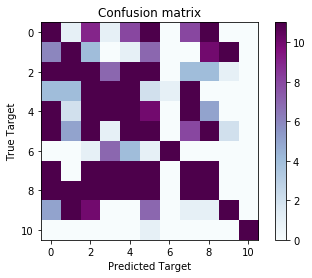

Accuracy for Knn:  0.7864990234375


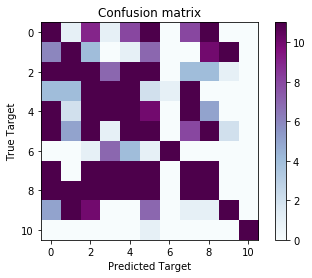

Recall for knn:  0.7904673834006936
Wall time: 2min 12s


In [16]:
%%time
y_pred=KNN(x_train, x_test, y_train,3)
print("Accuracy for Knn: ", Accuracy(y_true, y_pred))
print("Recall for knn: ", Recall(y_true, y_pred))

#NOTE: COnfusion is matrix is printed everytime confusion matrix is called.

# Random Forest 

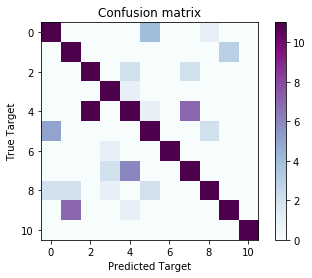

Accuracy for Random Forest:  0.9923095703125


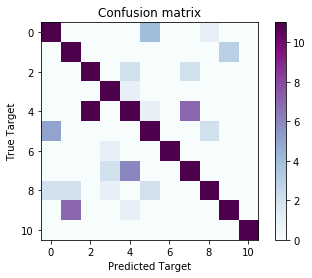

Recall for Random Forest:  0.992338560244525
Wall time: 4min 14s


In [17]:
%%time
y_pred = RandomForest(x_train, y_train, x_test)
print("Accuracy for Random Forest: ", Accuracy(y_true, y_pred))
print("Recall for Random Forest: ", Recall(y_true, y_pred))

# Principal Component Analysis (PCA)

In [18]:
%%time
pca=PCA(x_train,3)
print(pca)

[[  3.85407815  -0.44836252  -0.72314782]
 [ -1.11033771  -1.19604392   0.2759783 ]
 [ -2.30288104   6.40155605   0.48740378]
 ...
 [-51.52341702  65.31402089   4.13032869]
 [  9.19259935   0.86613098  -0.18125147]
 [ 10.45657576  -2.01676579  -0.64182023]]
Wall time: 62 ms


# Kmeans

In [26]:
%%time
cluster=Kmeans(x_train,3)
wcss=WCSS(cluster)
print("WCSS: ",wcss)

WCSS:  9268605.91492635
Wall time: 51.5 s


# Part  2

# Supervised learning algorithms using scikit library-  SVM, Logistic Regression, Decision tree, KNN

In [20]:
%%time
y_pred=SklearnSupervisedLearning(x_train,y_train,x_test)
print(y_pred)


[6 1 5 ... 6 4 6]
[9 6 5 ... 1 5 6]
[8 1 5 ... 1 4 6]
[8 1 5 ... 6 4 6]
[array([6, 1, 5, ..., 6, 4, 6], dtype=int64), array([9, 6, 5, ..., 1, 5, 6], dtype=int64), array([8, 1, 5, ..., 1, 4, 6], dtype=int64), array([8, 1, 5, ..., 6, 4, 6], dtype=int64)]
Wall time: 2min 24s


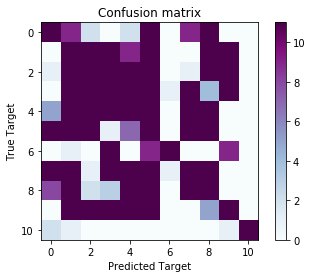

Accuracy for Logistic Regression  :  0.602294921875


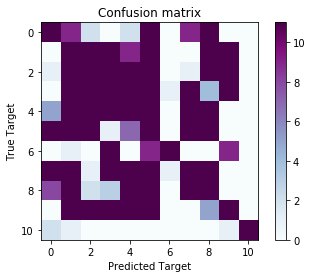

Recall for Logistic Regression:  0.6386461560215356


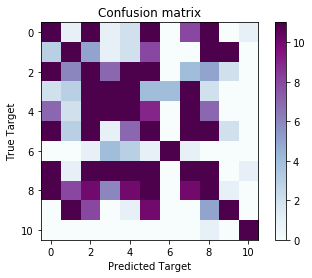

Accuracy for knn:  0.801025390625


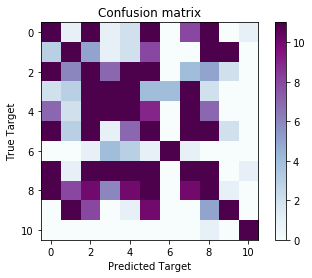

Recall for knn:  0.8031130119760933


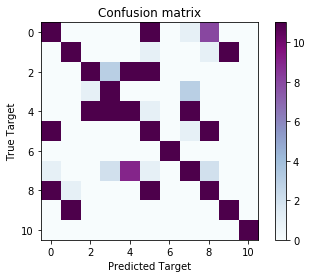

Accuracy for Decision tree:  0.910888671875


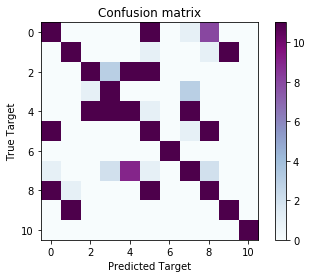

Recall for Decision tree:  0.9119602823936903


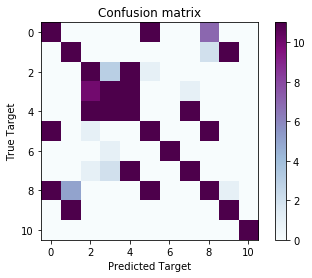

Accuracy for SVM:  0.898193359375


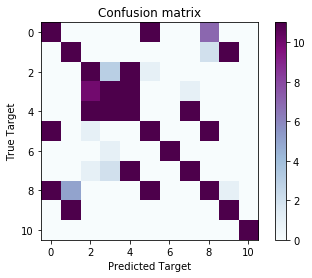

Recall for SVM:  0.8986818217145984


In [21]:
#Logistic Regression
print("Accuracy for Logistic Regression  : ", Accuracy(y_true, y_pred[0]))
print("Recall for Logistic Regression: ", Recall(y_true, y_pred[0]))
# #knn
print("Accuracy for knn: ", Accuracy(y_true, y_pred[1]))
print("Recall for knn: ", Recall(y_true, y_pred[1]))
# #DecisionTree
print("Accuracy for Decision tree: ", Accuracy(y_true, y_pred[2]))
print("Recall for Decision tree: ", Recall(y_true, y_pred[2]))
# #SVM
print("Accuracy for SVM: ", Accuracy(y_true, y_pred[3]))
print("Recall for SVM: ", Recall(y_true, y_pred[3]))

# Ensemble model using the voting classifier for SVM, Logistic Regression, Decision tree, KNN

C:\Users\malin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\malin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\malin\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\malin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\malin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will cha

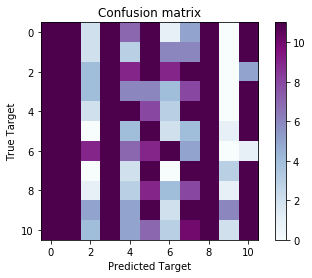

Accuracy for ensembler:  0.2274169921875


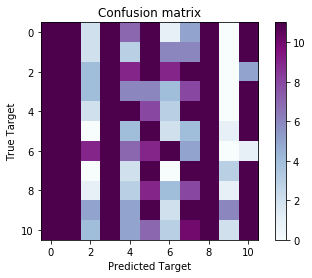

Recall for ensembler:  0.3368394487676038
Wall time: 7min 40s


In [22]:
%%time
y_pred=SklearnVotingClassifier(x_train,y_train,x_test)
print("Accuracy for ensembler: ", Accuracy(y_true, y_pred))
print("Recall for ensembler: ", Recall(y_true, y_pred))